Created on Wed Oct 14 18:45:24 2020
@author: ariel

# Implenting Simple Linear Regression from scratch.

## Background:

- Problem type: regression
    
* Assumptions on data: this method assumes **linear relationship** between the dependent (y)
    and independent (x) variables.
    there is also **one** variable of each, and they follow the equation: _y=ax+b_ where a,b are constants.
        
* Algorithm:
    * the goal of the algorithm is to create the trend line that is closest to all of the
    data points. the distance from all data points is our Loss Function and is calculated by the
    Mean of Squared Errors: MSE (error also called residuals). the errors are squared so we can handle
    positive numbers, while emphasising the error rate for each prediction.
    by minimizing the loss function, we get the best trend line to predict next values.
    this is done by the derivitive of our Loss function:
    **proof: https://youtu.be/mIx2Oj5y9Q8**
    
    later we will calculate the covariance, which states how much do two variables change together.
    this will allow us to calculate the coefficients a,b that will determine the trend line!
    the slope (a) is calculated by dividing the covariance by the variance:
    **proof: https://youtu.be/ualmyZiPs9w**
    
    the intercept (b) is calculated by the mean of independent variable values, minus the product of the mean of independent variable by the slope (a)
    **proof: https://youtu.be/8RSTQl0bQuw**
    
* Assesing algorithm's performance: using RMSE (root of Mean of Squared Errors), which gives
    the standard deviation of the residuals (prediction errors). it tells us how concentrated
    the data is around our trend line of predictions.
    we will also use r-squared, which represents the proportion of the variance
    for a dependent variable that's explained by an independent variable or variables
    in our regression model. 
    **proof:: https://youtu.be/Fc5t_5r_7IU**
    
## The Dataset
* Salary of employees by thier years of experience. the file's format is CSV and contains 31 lines including headers

##### importing the dataset

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv(r'C:\Users\ariel\Documents\ML implementations\Simple Linear Regression\Salary_Data.csv')

In [25]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


##### x, y split

In [26]:
x = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

##### plotting the data

<function matplotlib.pyplot.show(*args, **kw)>

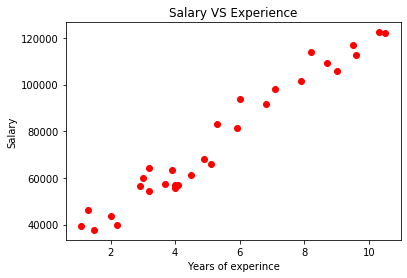

In [27]:
plt.scatter(x, y, color = 'red')
plt.title('Salary VS Experience')
plt.xlabel('Years of experince')
plt.ylabel('Salary')
plt.show

## The Data seems to fit the Linear Regression Assumption. Let's build the model!

##### calculate MSE

In [28]:
def Mean(values):
    return sum(values) / len(values)

def SumOfSquaredErrors(values, mean):
    return sum([(value - mean)**2 for value in values])

##### calculate variance

In [29]:
def Variance(x):
    meanX = Mean(x)
    return SumOfSquaredErrors(x, meanX)

##### calculate covariance between x and y

In [30]:
def Covariance(x, meanX, y, meanY):
	covar = 0.0
	for i in range(len(x)):
		covar += ((x[i] - meanX) * (y[i] - meanY))
	return covar

##### calculate coefficients

In [31]:
def Coefficients(covar, varianceX, meanX, meanY):
    a = covar / varianceX #slope
    b = meanY - (a * meanX)
    return [a, b]

##### create a prediction trend-line using the calculated coefficients

In [32]:
def TrendLinePredict(a, b, x):
    y = a*x + b
    return y

##### executing previous steps

In [33]:
meanX = Mean(xTrain)
meanY = Mean(yTrain)
covar = Covariance(xTrain, meanX, yTrain, meanY)
varianceX = Variance(xTrain)
coefficients = Coefficients(covar, varianceX, meanX, meanY)
trendLine = TrendLinePredict(coefficients[0], coefficients[1], xTrain)

## Now we have the trend line! let's plot it to see if it makes a good prediction for our data

##### the trend line with the training data

<function matplotlib.pyplot.show(*args, **kw)>

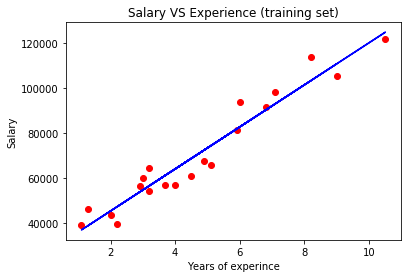

In [34]:
plt.scatter(xTrain, yTrain, color = 'red')
plt.plot(xTrain, trendLine, color = 'blue')
plt.title('Salary VS Experience (training set)')
plt.xlabel('Years of experince')
plt.ylabel('Salary')
plt.show

##### the trend line with the test data

<function matplotlib.pyplot.show(*args, **kw)>

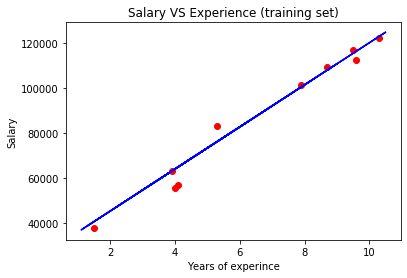

In [35]:
plt.scatter(xTest, yTest, color = 'red')
plt.plot(xTrain, trendLine, color = 'blue')
plt.title('Salary VS Experience (test set)')
plt.xlabel('Years of experince')
plt.ylabel('Salary')
plt.show

## Now let's use RMSE and R squared metrics to determine how good our predictions are

##### creating prediction list

In [36]:
def TestPredictions(xTest, coefficients):
    yPred = []
    for i in xTest:
        yPred.append(i*coefficients[0] + coefficients[1])
    return yPred

##### calculating RMSE

In [37]:
import math
def RMSE(yPred, yTest):
    return math.sqrt((sum((yPred - yTest)**2))/ len(yTest))

In [38]:
yPred = TestPredictions(xTest, coefficients)
print(RMSE(yPred, yTest))

4585.415720467589


##### note: the RMSE is in base units, which tell us that the standard deviation of the error are about 4585 USD

##### calculate R squared

In [39]:
def Rsquared(yTest, yPred, meanY):
    squaredErrorFromLine = (yPred - yTest)**2
    squaredErrorFromMeanY = (yPred - meanY)**2
    sumSquaredFromLine = sum(squaredErrorFromLine)
    sumsquaredFromMeanY = sum(squaredErrorFromMeanY)
    return 1 - (sumSquaredFromLine / sumsquaredFromMeanY)

print(Rsquared(yTest, yPred, meanY))

0.9791910966665737
